<a href="https://colab.research.google.com/github/Sneha-Devare/Water_Shop_Analytics/blob/main/Copy_of_Water_Shop_Analytics_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Water Shop Analytics ML Project**

In [1]:
# Water Shop Analytics ML Project

#### **Project Overview**
The Water Shop Analytics System is a business-focused solution designed to provide clear visibility into customer visits, water can sales, payment behavior, and shop operations using CCTV footage. The system replaces manual tracking with automated insights to support better business decisions.

In [11]:
# Installation of YOLO
!pip install ultralytics    # Ultralytics is a library that created modern YOLO models

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.5 MB/s eta 0:00:00


In [12]:
# Loading YOLO model
from ultralytics import YOLO     # Importing YOLO model from Ultralytics
# We use yolov8s.pt because it gives better detection accuracy and running fast
model = YOLO('yolov8m.pt')
print('Model Loaded')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Model Loaded


In [13]:
# Importing matplotlotlib
# We are importing matplotlib to show images inside the notebook
import matplotlib.pyplot as plt


image 1/1 /content/zidane.jpg: 384x640 3 persons, 2 ties, 1427.3ms
Speed: 16.2ms preprocess, 1427.3ms inference, 45.5ms postprocess per image at shape (1, 3, 384, 640)
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: '

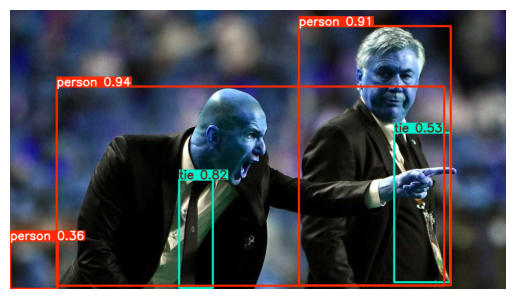

In [14]:
# Testing if a model can detect objects in an image
results = model("https://ultralytics.com/images/zidane.jpg")   # Sends an image to the YOLO model to detect objects
# Detection result stored in results object
# .plot() method draws bounding boxes around detected objects and adds labels to the image.
img = results[0].plot()      # It draws boxes and labels on the image and saves the new image in img.
plt.imshow(img)                 # Displaying image
plt.axis("off")         # No axis shown
print(results[0].names)        # All possible classes that model knows
print(results[0].boxes.cls)     # Shows classes which are detected

In [43]:
# Connecting of Google Drive with colab environment
from google.colab import drive    # Import Google Drive feature into the colab, so we can use it in our notebook
drive.mount('/content/drive')   #  Drive is just a folder created inside /content where our Google Drive gets attached.

ValueError: Mountpoint must not already contain files

In [44]:
import os
base_path = "/content/drive/MyDrive/water_project"
folders = [
    "dataset/images/train",
    "dataset/images/val",
    "dataset/labels/train",
    "dataset/labels/val"
]
for folder in folders:
    os.makedirs(os.path.join(base_path, folder), exist_ok=True)

print("Dataset folders ready")

Dataset folders ready


In [45]:
from google.colab import files
uploaded = files.upload()

import shutil

train_path = "/content/drive/MyDrive/water_project/dataset/images/train"

for f in uploaded:
    shutil.move(f, train_path + "/" + f)

print("Images moved")

Saving Screenshot (221).png to Screenshot (221).png
Saving Screenshot (220).png to Screenshot (220).png
Saving Screenshot (219).png to Screenshot (219).png
Saving Screenshot (217).png to Screenshot (217).png
Saving Screenshot (216).png to Screenshot (216).png
Saving Screenshot (215).png to Screenshot (215).png
Saving Screenshot (214).png to Screenshot (214).png
Saving Screenshot (212).png to Screenshot (212).png
Saving Screenshot (211).png to Screenshot (211).png
Saving Screenshot (207).png to Screenshot (207).png
Saving Screenshot (205).png to Screenshot (205).png
Images moved
